In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os



In [43]:
tsla_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/TSLA_data1.csv')
tsla_norm_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/TSLA_Normalised_OHLC_VWAP_VOL.csv')


In [44]:
tsla_norm_data.loc[tsla_norm_data['Close_Price'] == 0, 'Close_Price'] = None
tsla_norm_data['Close_Price'] = tsla_norm_data['Close_Price'].ffill()

tsla_norm_data['Daily_Return'] = tsla_norm_data['Close_Price'].pct_change()

tsla_norm_data['Daily_Return'] = tsla_norm_data['Daily_Return'].replace([np.inf, -np.inf], np.nan)
tsla_norm_data['Daily_Return'] = tsla_norm_data['Daily_Return'].fillna(0)  

drift = tsla_norm_data['Daily_Return'].mean()

volatility = tsla_norm_data['Daily_Return'].std()

print(f"Drift (Average Return): {drift:.6f}")
print(f"Volatility (Standard Deviation): {volatility:.6f}")



Drift (Average Return): 0.005140
Volatility (Standard Deviation): 0.078022


In [46]:
import numpy as np

S0 = tsla_norm_data['Close_Price'].iloc[-1]  
N = 10000  
T = 252  

price_paths = np.zeros((T, N))
price_paths[0] = S0  

for t in range(1, T):
    random_shocks = np.random.normal(0, 1, N)  
    price_paths[t] = price_paths[t - 1] * np.exp(
        (drift - 0.5 * volatility**2) * (1 / T) + volatility * random_shocks * np.sqrt(1 / T)
    )

print(price_paths[:10, :5])  


[[0.90663112 0.90663112 0.90663112 0.90663112 0.90663112]
 [0.90810363 0.90280074 0.90464726 0.91270971 0.90551257]
 [0.90444135 0.89747381 0.91094523 0.9086028  0.90869847]
 [0.90528349 0.89536333 0.92170234 0.90569129 0.91002948]
 [0.9067999  0.89305098 0.92466194 0.90749529 0.90938306]
 [0.90973331 0.89767084 0.92322939 0.90290513 0.90548886]
 [0.90544134 0.89999172 0.91665889 0.90333245 0.90790468]
 [0.90177075 0.90000332 0.90895482 0.90168939 0.90533246]
 [0.89646438 0.90594801 0.91689441 0.89779603 0.9128832 ]
 [0.89258815 0.90791137 0.9129032  0.89558358 0.91112191]]


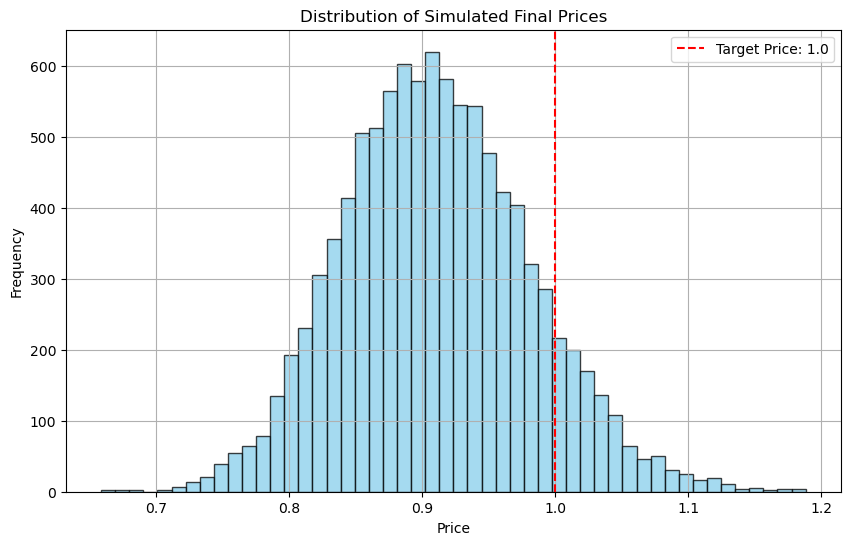

Histogram saved as TSLA_Analysis_Results/TSLA_Target_Price_Analysis_1.0.png


In [58]:
import os
import matplotlib.pyplot as plt

target_price = 1.0  
final_prices = price_paths[-1]  

plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=50, alpha=0.75, edgecolor='black', color='skyblue')
plt.axvline(target_price, color='red', linestyle='--', label=f"Target Price: {target_price}")
plt.title(f"Distribution of Simulated Final Prices")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

output_dir = "TSLA_Analysis_Results"
os.makedirs(output_dir, exist_ok=True) 
histogram_filename = f"TSLA_Target_Price_Analysis_{target_price}.png"
plt.savefig(os.path.join(output_dir, histogram_filename))
plt.show()

print(f"Histogram saved as {os.path.join(output_dir, histogram_filename)}")
